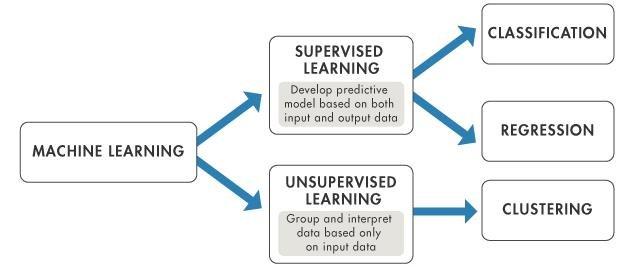

In [ ]:
#. Problem Identification:
#The first step in creating a Machine Learning project is identifying the problem you need to solve.

#Ask questions like “what outcome is desired?” and “what is the problem that is being attempted to solve here?”

#To answer to these questions, simply, you are going to match the business probem you're trying to solve a machine learning problem.

In [2]:
#Every Machine Learning project involves understanding the data and the objective that you’re trying to achieve. There are 7 steps that you need to know if you want to create and build a well-defined machine learning project:
#1. Understanding the problem
#2. Choosing an appropriate data
#3. Preparing the data
#4. Some visualization
#5. Choosing the right algorithm#6. Modeling
#7. Experimentation

In [3]:
#7. Experimentation before project execution:
#This step involves all the previous steps where you’ll make sure that your experiments are actionable.
#To ensure this step, you may simply ask these questions:
#How long do we have timeline?
#What doesn't work?
#What else could we try?
#Does our deployed model do as we expected?

In [4]:
#TASK #: IMPORT LIBRAIRIES AND DATASETS

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data=pd.read_csv('Churn_Modelling.csv')
data
#CustomerId:Identification of Credit Card holder 
#Surname:
#CreditScore:is a number between 300–850 that depicts a consumer's creditworthiness. The higher the score, the better a borrower looks to potential lenders.
#Geography:is the study of places and the relationships between people and their environments
#Gender: is used to describe the characteristics of women and men that are socially constructed,
#Age: the age of cutomer
#Tenure:Tenure(mandat) of credit card service for user
#Balance:Balance amount left in customer's account to make purchases
#NumOfProducts:numéro des produits
#IsActiveMember:the customer is active or not
#EstimatedSalary:
#Exited:the customer is exited or not

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0          2       0.00              1          1               1   
1          1   83807.86              1          0               1   
2          8  159660.80              3          1               0   
3          1       0.00              2          0               0   
4          2  125510.82              1          1               1   
...      ...        ...            ...        ...             ...   
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
0           101348.88       1  
1           112542.58       0  
2           113931.57       1  
3            93826.63       0  
4            79084.10       0  
...               ...     ...  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0  

[10000 rows x 14 columns]

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
data.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited  
count     10000.000000  10000.000000  
mean     100090.239881      0.203700  
std       57510.492818      0.402769  
min          11.580000      0.000000  
25%       51002.110000      0.000000  
50%      100193.915000      0.000000  
75%      149388.247500      0.000000  
max      199992.480000      1.000000

In [9]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

<AxesSubplot:>

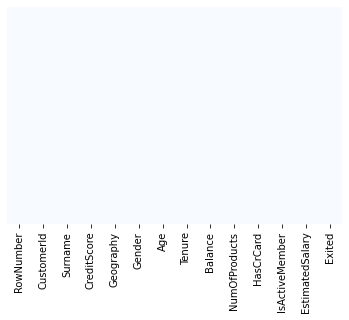

In [10]:
sns.heatmap(data.isnull(),yticklabels=False, cbar=False, cmap="Blues")

In [11]:
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [12]:
target_1 = data[data["Exited"]==1]

In [13]:
target_0 = data[data["Exited"]==0]

In [14]:
from sklearn.utils import resample

In [15]:
# Downsample majority and combine with minority
fraud_downsampled = resample(target_0, replace = False,  n_samples = len(target_1), random_state = 123)
downsampled = pd.concat([fraud_downsampled, target_1])

<AxesSubplot:xlabel='Exited', ylabel='count'>

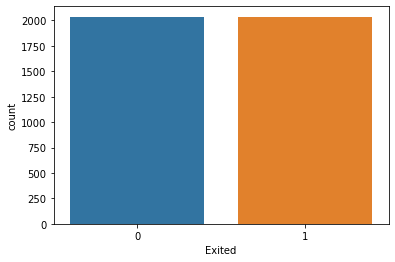

In [16]:
sns.countplot(x="Exited", data=downsampled)

In [17]:
from pandas_profiling import ProfileReport
report=ProfileReport(data,title="EDA")
report

<AxesSubplot:>

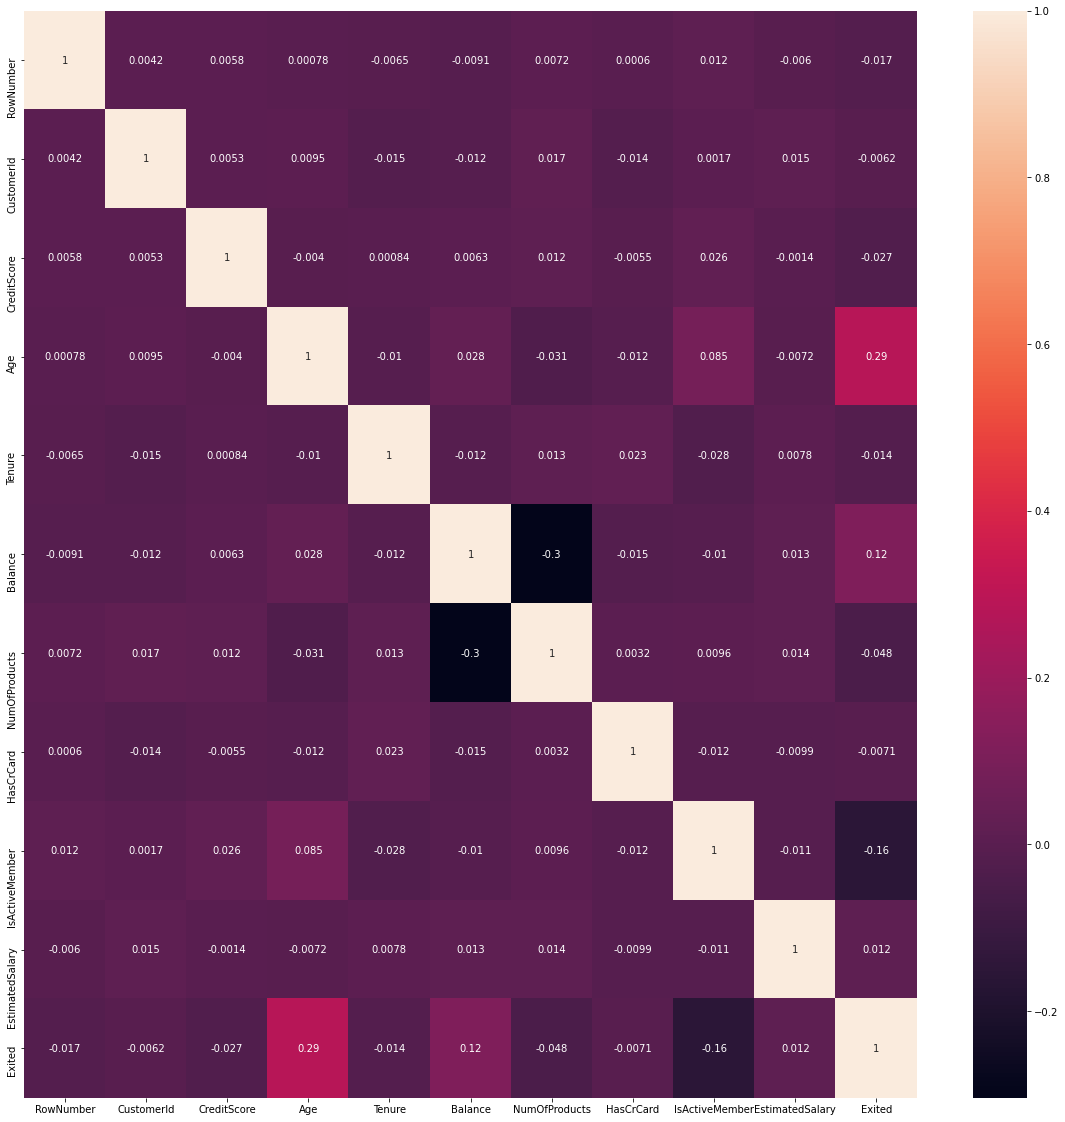

In [18]:
ax,fig=plt.subplots(figsize=(20,20))
corm=data.corr()
sns.heatmap(corm,annot=True)

In [19]:
data.corr()

RowNumber  CustomerId  CreditScore       Age    Tenure  \
RowNumber         1.000000    0.004202     0.005840  0.000783 -0.006495   
CustomerId        0.004202    1.000000     0.005308  0.009497 -0.014883   
CreditScore       0.005840    0.005308     1.000000 -0.003965  0.000842   
Age               0.000783    0.009497    -0.003965  1.000000 -0.009997   
Tenure           -0.006495   -0.014883     0.000842 -0.009997  1.000000   
Balance          -0.009067   -0.012419     0.006268  0.028308 -0.012254   
NumOfProducts     0.007246    0.016972     0.012238 -0.030680  0.013444   
HasCrCard         0.000599   -0.014025    -0.005458 -0.011721  0.022583   
IsActiveMember    0.012044    0.001665     0.025651  0.085472 -0.028362   
EstimatedSalary  -0.005988    0.015271    -0.001384 -0.007201  0.007784   
Exited           -0.016571   -0.006248    -0.027094  0.285323 -0.014001   

                  Balance  NumOfProducts  HasCrCard  IsActiveMember  \
RowNumber       -0.009067       0.007246   0.000599        0.012044   
CustomerId      -0.012419       0.016972  -0.014025        0.001665   
CreditScore      0.006268       0.012238  -0.005458        0.025651   
Age              0.028308      -0.030680  -0.011721        0.085472   
Tenure          -0.012254       0.013444   0.022583       -0.028362   
Balance          1.000000      -0.304180  -0.014858       -0.010084   
NumOfProducts   -0.304180       1.000000   0.003183        0.009612   
HasCrCard       -0.014858       0.003183   1.000000       -0.011866   
IsActiveMember  -0.010084       0.009612  -0.011866        1.000000   
EstimatedSalary  0.012797       0.014204  -0.009933       -0.011421   
Exited           0.118533      -0.047820  -0.007138       -0.156128   

                 EstimatedSalary    Exited  
RowNumber              -0.005988 -0.016571  
CustomerId              0.015271 -0.006248  
CreditScore            -0.001384 -0.027094  
Age                    -0.007201  0.285323  
Tenure                  0.007784 -0.014001  
Balance                 0.012797  0.118533  
NumOfProducts           0.014204 -0.047820  
HasCrCard              -0.009933 -0.007138  
IsActiveMember         -0.011421 -0.156128  
EstimatedSalary         1.000000  0.012097  
Exited                  0.012097  1.000000

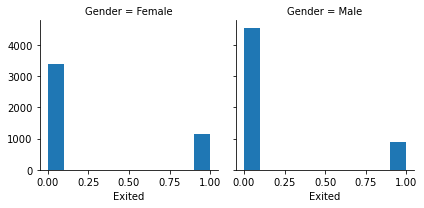

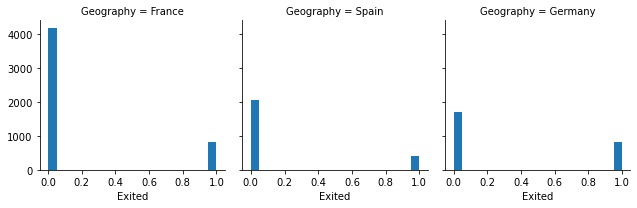

In [20]:
corre_lation=sns.FacetGrid(data,col='Gender')
corre_lation.map(plt.hist,'Exited',bins=10)
corre_lation=sns.FacetGrid(data,col='Geography')
corre_lation.map(plt.hist,'Exited',bins=20)

In [21]:
data

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0          2       0.00              1          1               1   
1          1   83807.86              1          0               1   
2          8  159660.80              3          1               0   
3          1       0.00              2          0               0   
4          2  125510.82              1          1               1   
...      ...        ...            ...        ...             ...   
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
0           101348.88       1  
1           112542.58       0  
2           113931.57       1  
3            93826.63       0  
4            79084.10       0  
...               ...     ...  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0  

[10000 rows x 14 columns]

<AxesSubplot:xlabel='count', ylabel='Geography'>

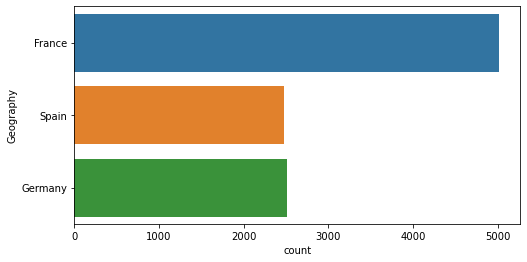

In [22]:
#Plotting 'Geography' using seaborn function 'countplot' with countplot function
plt.figure(figsize=(8, 4))
sns.countplot(data = data , y = 'Geography')

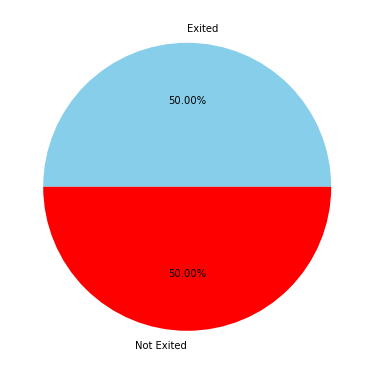

In [23]:
#Now we try a Pie chart
fig = plt.figure(figsize=(5,5))
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
Leg = downsampled.Exited.value_counts() 
labels = ['Exited', 'Not Exited']
ax.pie(Leg, labels = labels,autopct='%1.2f%%',colors=['skyblue','red'])
plt.show()

In [26]:
print(data.groupby('Exited')['Geography'].value_counts())

Exited  Geography
0       France       4204
        Spain        2064
        Germany      1695
1       Germany       814
        France        810
        Spain         413
Name: Geography, dtype: int64


In [29]:
# Import pandas
import pandas as pd

# Perform one hot encoding on 'Geography'
data_geography = pd.get_dummies(data['Geography'])

# Print the head of data_geography
print(data_geography .head())

   France  Germany  Spain
0       1        0      0
1       0        0      1
2       1        0      0
3       1        0      0
4       0        0      1


In [30]:
data=data.join(df_geography)

In [31]:
data

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0          2       0.00              1          1               1   
1          1   83807.86              1          0               1   
2          8  159660.80              3          1               0   
3          1       0.00              2          0               0   
4          2  125510.82              1          1               1   
...      ...        ...            ...        ...             ...   
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  France  Germany  Spain  
0           101348.88       1       1        0      0  
1           112542.58       0       0        0      1  
2           113931.57       1       1        0      0  
3            93826.63       0       1        0      0  
4            79084.10       0       0        0      1  
...               ...     ...     ...      ...    ...  
9995         96270.64       0       1        0      0  
9996        101699.77       0       1        0      0  
9997         42085.58       1       1        0      0  
9998         92888.52       1       0        1      0  
9999         38190.78       0       1        0      0  

[10000 rows x 17 columns]

In [32]:
data.drop('Geography',axis=1,inplace=True)

In [33]:
data.head()

RowNumber  CustomerId   Surname  CreditScore  Gender  Age  Tenure  \
0          1    15634602  Hargrave          619  Female   42       2   
1          2    15647311      Hill          608  Female   41       1   
2          3    15619304      Onio          502  Female   42       8   
3          4    15701354      Boni          699  Female   39       1   
4          5    15737888  Mitchell          850  Female   43       2   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       0.00              1          1               1        101348.88   
1   83807.86              1          0               1        112542.58   
2  159660.80              3          1               0        113931.57   
3       0.00              2          0               0         93826.63   
4  125510.82              1          1               1         79084.10   

   Exited  France  Germany  Spain  
0       1       1        0      0  
1       0       0        0      1  
2       1       1        0      0  
3       0       1        0      0  
4       0       0        0      1

In [34]:
data['Gender']=data['Gender'].replace("Female",0)
data['Gender']=data['Gender'].replace("Male",1)

In [35]:
data.drop('CustomerId',axis=1 ,inplace=True)

In [36]:
data.drop('RowNumber',axis=1,inplace=True)

In [39]:
data.drop('Surname',axis=1,inplace=True)

In [40]:
data.head()

CreditScore  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619       0   42       2       0.00              1          1   
1          608       0   41       1   83807.86              1          0   
2          502       0   42       8  159660.80              3          1   
3          699       0   39       1       0.00              2          0   
4          850       0   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  France  Germany  Spain  
0               1        101348.88       1       1        0      0  
1               1        112542.58       0       0        0      1  
2               0        113931.57       1       1        0      0  
3               0         93826.63       0       1        0      0  
4               1         79084.10       0       0        0      1

In [41]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Scale telco using StandardScaler
data_scaled = StandardScaler().fit_transform(data)


In [43]:
print(data_scaled)

[[-0.32622142 -1.09598752  0.29351742 ...  0.99720391 -0.57873591
  -0.57380915]
 [-0.44003595 -1.09598752  0.19816383 ... -1.00280393 -0.57873591
   1.74273971]
 [-1.53679418 -1.09598752  0.29351742 ...  0.99720391 -0.57873591
  -0.57380915]
 ...
 [ 0.60498839 -1.09598752 -0.27860412 ...  0.99720391 -0.57873591
  -0.57380915]
 [ 1.25683526  0.91241915  0.29351742 ... -1.00280393  1.72790383
  -0.57380915]
 [ 1.46377078 -1.09598752 -1.04143285 ...  0.99720391 -0.57873591
  -0.57380915]]


In [ ]:
#distplot combines the matplotlib.hist function with seaborn kdeplot()
#KDE plot represents the kernel Density Estimate(methode d'estimation par noyeau)
#KDE is used for visualizing the probability Density of a continuous variable
#KDE demonstrates the probability density at different values in a continuous variable

C:\Users\AYA LAJILI\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\AYA LAJILI\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\AYA LAJILI\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplo

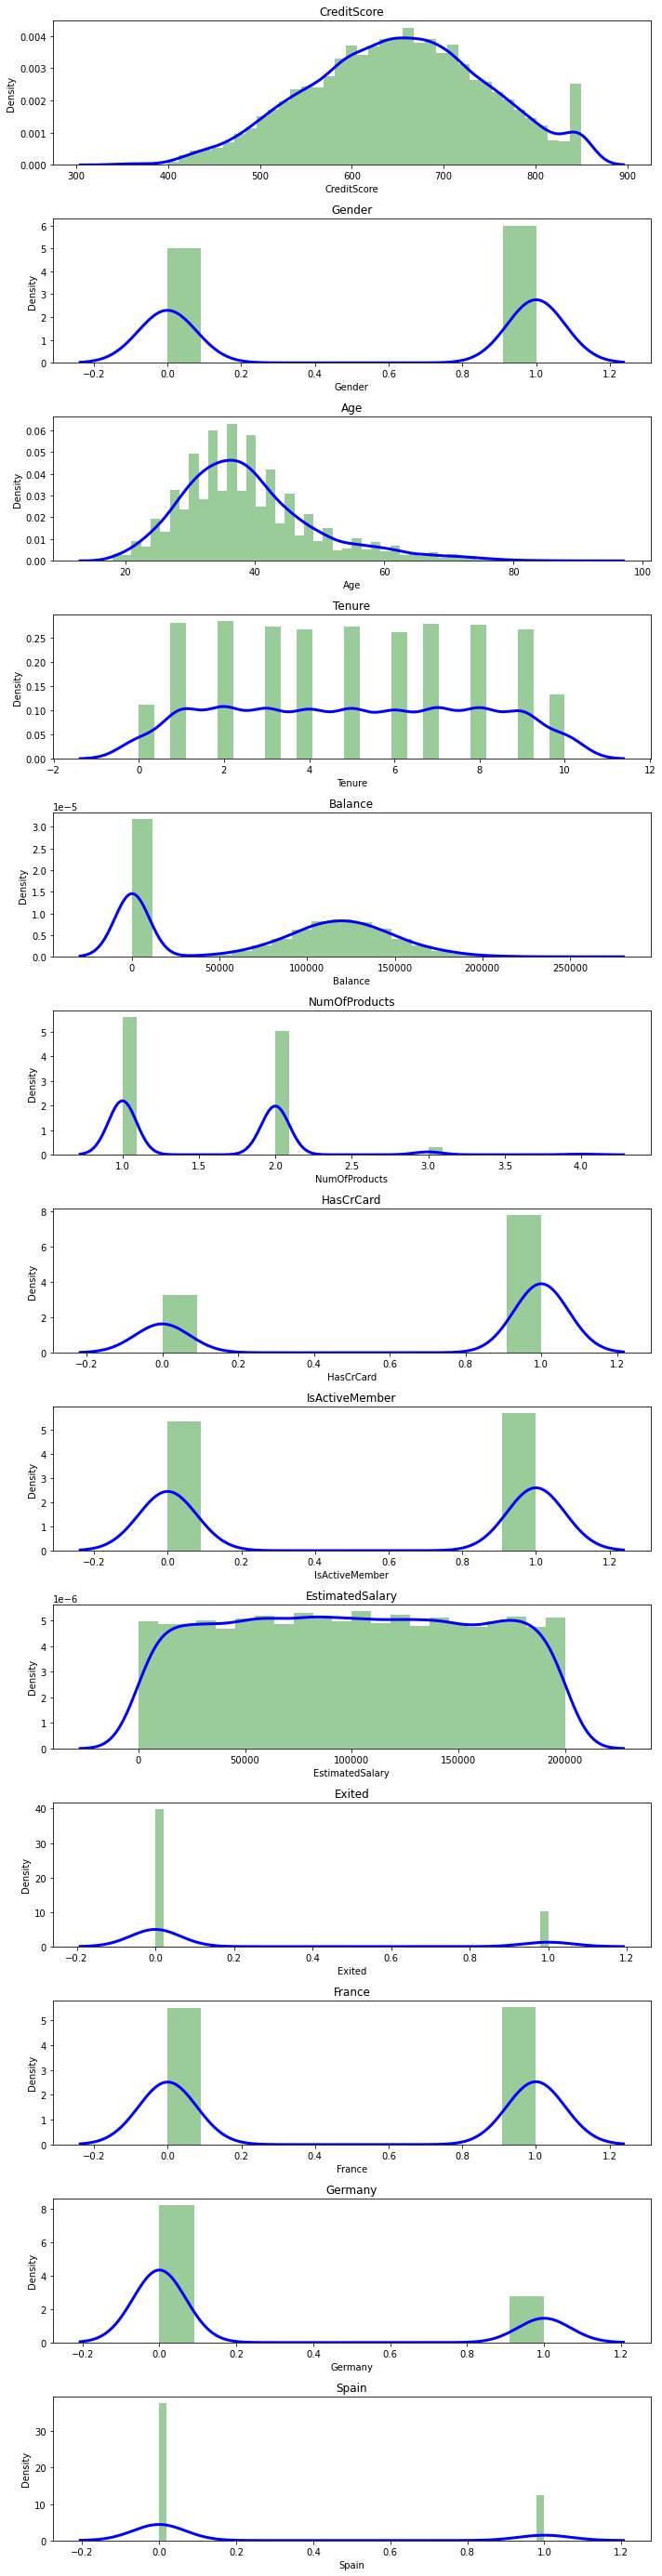

In [44]:
plt.figure(figsize=(10,50))
for i in range(len(data.columns)):
  plt.subplot(17,1,i+1)#paremeters:(nrows,ncols,index)
  sns.distplot(data[data.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"} , hist_kws={"color": "g"})
  plt.title(data.columns[i])

plt.tight_layout()

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
X=data.drop('Exited',axis=1).values
y=data['Exited'].values.reshape(-1,1)

In [53]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# Create the classifier: logreg
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train,y_train)


# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[1573   34]
 [ 365   28]]
              precision    recall  f1-score   support

           0       0.81      0.98      0.89      1607
           1       0.45      0.07      0.12       393

    accuracy                           0.80      2000
   macro avg       0.63      0.53      0.51      2000
weighted avg       0.74      0.80      0.74      2000



C:\Users\AYA LAJILI\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [54]:
simp = X_test[0]

In [55]:
simp

array([5.960000e+02, 1.000000e+00, 3.200000e+01, 3.000000e+00,
       9.670907e+04, 2.000000e+00, 0.000000e+00, 0.000000e+00,
       4.178837e+04, 0.000000e+00, 1.000000e+00, 0.000000e+00])

In [56]:
pred = logreg.predict(simp.reshape(1,-1))

In [57]:
pred

array([0], dtype=int64)

In [58]:
# Import necessary modules
from sklearn.model_selection import GridSearchCV
from  sklearn.linear_model import  LogisticRegression

# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression()

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv =  GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the data
logreg_cv.fit(X,y)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))


C:\Users\AYA LAJILI\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\AYA LAJILI\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\AYA LAJILI\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\AYA LAJILI\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ra

C:\Users\AYA LAJILI\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\AYA LAJILI\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\AYA LAJILI\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\AYA LAJILI\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ra

C:\Users\AYA LAJILI\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\AYA LAJILI\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\AYA LAJILI\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\AYA LAJILI\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ra

Tuned Logistic Regression Parameters: {'C': 1e-05}
Best score is 0.794


In [59]:
# Import recall_score
from sklearn.metrics import precision_score
# Print the recall
print(precision_score(y_test, y_pred))

0.45161290322580644


In [ ]:
#F1 score
#As you've discovered, there's a tradeoff between precision and recall. Both are important metrics, and depending on how the business is trying to model churn, you may want to focus on optimizing one over the other. Often, stakeholders are interested in a single metric that can quantify model performance. The AUC is one metric you can use in these cases, and another is the F1 score, which is calculated as below:

#2 * (precision * recall) / (precision + recall)
#The advantage of the F1 score is it incorporates both precision and recall into a single metric, and a high F1 score is a sign of a well-performing model, even in situations where you might have imbalanced classes. In scikit-learn, you can compute the f-1 score using using the f1_score function.

In [60]:
# Import f1_score
from sklearn.metrics import f1_score

# Print the F1 score
print(f1_score(y_test,y_pred))

0.12307692307692307


In [61]:
from sklearn.model_selection import cross_val_score
# Perform 3-fold CV
cvscores_3 = cross_val_score(logreg,X,y,cv=3)
print(np.mean(cvscores_3))

C:\Users\AYA LAJILI\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\AYA LAJILI\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\AYA LAJILI\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.7905996958424097


In [62]:
from sklearn.model_selection import cross_val_score
# Perform 3-fold CV
cvscores_3 = cross_val_score(logreg,X,y,cv=3)
print(np.mean(cvscores_3))


C:\Users\AYA LAJILI\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\AYA LAJILI\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\AYA LAJILI\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.7905996958424097


In [63]:
#Perform 10-fold CV
cvscores_10 = cross_val_score(logreg,X,y,cv=10)
print(np.mean(cvscores_10))

C:\Users\AYA LAJILI\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\AYA LAJILI\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\AYA LAJILI\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\AYA LAJILI\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ra

0.7901


C:\Users\AYA LAJILI\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


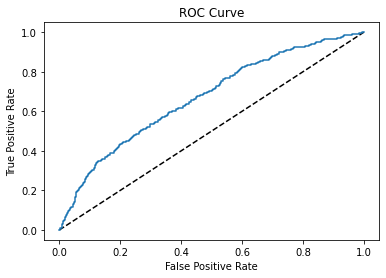

In [73]:
from sklearn.metrics import roc_curve
# Compute predicted probabilities: y_pred_prob
logreg.fit(X_train,y_train)
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test,y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [72]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
logreg.fit(X_train,y_train)
# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(logreg,X,y,cv=5,scoring = 'roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))
print(np.mean(cv_auc))

C:\Users\AYA LAJILI\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\AYA LAJILI\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


AUC: 0.6687979276416315


C:\Users\AYA LAJILI\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\AYA LAJILI\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\AYA LAJILI\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


AUC scores computed using 5-fold cross-validation: [0.67282183 0.66405249 0.65769313 0.69006911 0.66731292]
0.67038989804218


C:\Users\AYA LAJILI\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [67]:
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
# Instantiate the classifier
clf = RandomForestClassifier()

# Fit to the training data
clf.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = clf.predict(X_test)

# Import confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score

# Print confusion matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

<ipython-input-67-bef9cf218f93>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


[[1545   62]
 [ 211  182]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.46      0.57       393

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000



In [68]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Instantiate the classifier
clf=DecisionTreeClassifier(criterion= 'entropy', max_depth= 3, max_features= 6, min_samples_leaf= 3)

# Fit the classifier
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

# Predict the label of new_customer
print(clf.predict(X_test[0].reshape(1,-1)))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

[0]
              precision    recall  f1-score   support

           0       0.84      0.96      0.90      1607
           1       0.63      0.26      0.36       393

    accuracy                           0.82      2000
   macro avg       0.73      0.61      0.63      2000
weighted avg       0.80      0.82      0.79      2000

[[1547   60]
 [ 292  101]]


In [69]:
#Import necessary modules
from scipy.stats import randint
from sklearn.model_selection  import RandomizedSearchCV
from sklearn import tree
from  sklearn.tree import  DecisionTreeClassifier
# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],#
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree,param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X_train,y_train)


# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))


Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 5, 'min_samples_leaf': 8}
Best score is 0.8248749999999999


In [70]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

# Create training and test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Instantiate a k-NN classifier: knn
knn = KNeighborsClassifier(n_neighbors=6)


# Fit the classifier to the training data
knn.fit(X_train,y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

<ipython-input-70-8ecbaf935c14>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train,y_train)


[[1569   38]
 [ 378   15]]
              precision    recall  f1-score   support

           0       0.81      0.98      0.88      1607
           1       0.28      0.04      0.07       393

    accuracy                           0.79      2000
   macro avg       0.54      0.51      0.48      2000
weighted avg       0.70      0.79      0.72      2000



In [71]:
# Import necessary modules
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Setup the hyperparameter grid
param_grid={'n_neighbors':[3,5,11,19], 'weights':['uniform','distance'],  'metric':['minkowski','manhattan']}

# Instantiate a  KNeighborsClassifier: knn
knn= KNeighborsClassifier()

# Instantiate the GridSearchCV object: logreg_cv
knn_cv =  GridSearchCV(knn, param_grid, cv=5)

# Fit it to the data
knn_cv.fit(X_train,y_train)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(knn_cv.best_params_)) 
print("Best score is {}".format(knn_cv.best_score_))

C:\Users\AYA LAJILI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\AYA LAJILI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\AYA LAJILI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\AYA LAJILI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarnin

C:\Users\AYA LAJILI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\AYA LAJILI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\AYA LAJILI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\AYA LAJILI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarnin

C:\Users\AYA LAJILI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\AYA LAJILI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\AYA LAJILI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\AYA LAJILI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarnin

Tuned Logistic Regression Parameters: {'metric': 'minkowski', 'n_neighbors': 19, 'weights': 'uniform'}
Best score is 0.792875


C:\Users\AYA LAJILI\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
